# Shape Detector

In [119]:
import cv2
import imutils
import matplotlib.pyplot as plt
import numpy as np

In [134]:
def plt_imshow(title,image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [135]:
image=cv2.imread("Images/shapes_and_colors.png")
resized=imutils.resize(image,width=300)
ratio=image.shape[0]/float(resized.shape[0])

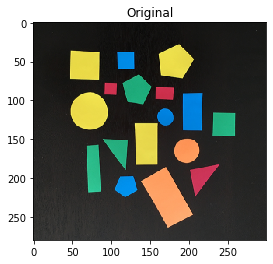

In [136]:
plt_imshow("Original",resized)

In [137]:
gray=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY) 
blur=cv2.GaussianBlur(gray,(5,5),-1)

In [146]:
# t,thresholded=cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)

t,thresholded=cv2.threshold(blur,60,255,cv2.THRESH_BINARY)


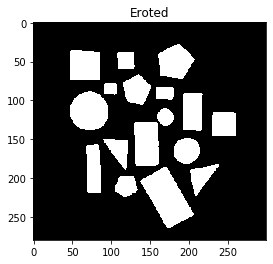

In [147]:
plt_imshow("Eroted",thresholded)

In [148]:
#Find Countour

countour=cv2.findContours(thresholded.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(countour)

In [149]:
class ShapeDetector:
	def __init__(self):
		pass

	def detect(self, c):
		# initialize the shape name and approximate the contour
		shape = "unidentified"
		peri = cv2.arcLength(c, True)
		approx = cv2.approxPolyDP(c, 0.04 * peri, True)

		# if the shape is a triangle, it will have 3 vertices
		if len(approx) == 3:
			shape = "triangle"

		# if the shape has 4 vertices, it is either a square or
		# a rectangle
		elif len(approx) == 4:
			# compute the bounding box of the contour and use the
			# bounding box to compute the aspect ratio
			(x, y, w, h) = cv2.boundingRect(approx)
			ar = w / float(h)

			# a square will have an aspect ratio that is approximately
			# equal to one, otherwise, the shape is a rectangle
			shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"

		# if the shape is a pentagon, it will have 5 vertices
		elif len(approx) == 5:
			shape = "pentagon"

		# otherwise, we assume the shape is a circle
		else:
			shape = "circle"

		# return the name of the shape
		return shape

In [150]:
sd=ShapeDetector()

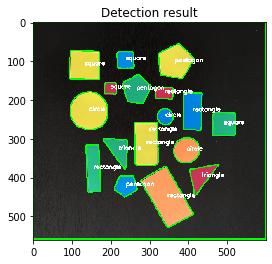

In [151]:
for c in cnts:
    M=cv2.moments(c)
    cX=int((M["m10"]/M["m00"])*ratio)
    cY=int((M["m01"]/M["m00"])*ratio)
    shape=sd.detect(c)
    
    c=c.astype("float")
    c*=ratio
    c=c.astype("int")
    cv2.drawContours(image,[c],-1,(0,255,0),2)
    cv2.putText(image,shape,(cX,cY),cv2.FONT_HERSHEY_SIMPLEX,0.5,(255,255,255),2)
    
plt_imshow("Detection result",image)

# Template Matching